In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/summer-analytics-mid-hackathon'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        print(f"{filename}\n")

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
hacktest.csv

/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv
hacktrain.csv



In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
traindf = pd.read_csv("hacktrain.csv")

traindf.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


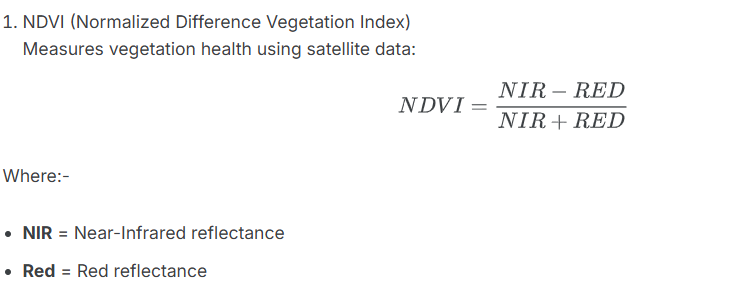

In [4]:
testdf = pd.read_csv("hacktest.csv")

testdf.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [4]:
traindf.shape, testdf.shape

((8000, 30), (2845, 29))

In [5]:
traindf.columns, testdf.columns

(Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
        '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
        '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
        '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
        '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
        '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
       dtype='object'),
 Index(['Unnamed: 0', 'ID', '20150720_N', '20150602_N', '20150517_N',
        '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
        '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
        '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
        '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
        '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
       dtype='object'))

In [6]:
traindf['class'].value_counts()

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64

To predict: Class in `testdf`

In [8]:
traindf.describe()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4984.202625,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,0.000000,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2514.750000,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4917.500000,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7311.250000,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10544.000000,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


In [9]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

In [8]:
traindf.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [9]:
traindf.isnull().sum().max()

1760

In [5]:
traindf.fillna(traindf.median(numeric_only=True), inplace=True)

In [12]:
traindf.isnull().sum()

Unnamed: 0    0
ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

In [6]:
traindf.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
traindf

,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,water,637.5950,658.668,-1882.030,-1924.360,997.904,-1739.990,630.087,5831.120,...,5484.905,-1043.160,-1942.490,267.138,1183.715,1599.385,211.3280,-2203.020,-1180.19,433.906
1,2,water,634.2400,593.705,-1625.790,-1672.320,914.198,-692.386,707.626,-1670.590,...,5484.905,-933.934,-625.385,120.059,364.858,476.972,220.8780,-2250.000,-1360.56,524.075
2,4,water,58.0174,-1599.160,4672.000,-1052.630,1586.240,-1564.630,2802.010,729.790,...,-1025.880,368.622,2633.695,-1227.800,304.621,1599.385,369.2140,-2202.120,1521.21,-1343.550
3,5,water,72.5180,5513.375,380.436,-1256.930,515.805,-1413.180,-802.942,683.254,...,-1813.950,155.624,2633.695,-924.073,432.150,282.833,298.3200,-2197.360,1521.21,-826.727
4,8,water,1136.4400,5513.375,4672.000,1647.830,1935.800,5742.485,2158.980,5831.120,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.6500,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,impervious,1207.7000,984.620,4672.000,1166.250,937.478,1072.700,823.896,943.698,...,1117.740,1176.600,1044.110,2624.125,369.082,465.843,362.8820,979.795,1521.21,433.659
7996,10539,impervious,2170.3500,1419.720,1361.000,1478.710,983.911,1262.110,1422.860,1401.970,...,984.634,2128.970,1379.660,2624.125,762.633,485.204,446.7240,771.747,1589.06,506.936
7997,10542,impervious,1895.6800,1454.740,4672.000,1033.560,1930.380,1057.150,1471.600,5831.120,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.0000,1818.650,2501.72,1247.770
7998,10543,impervious,3465.7400,1283.320,413.412,4391.050,1146.820,4473.050,1614.750,770.469,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,969.7115,3759.710,1521.21,388.346


In [7]:
X = traindf.drop(columns=['class'])

In [22]:
traindf

,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,water,637.5950,658.668,-1882.030,-1924.360,997.904,-1739.990,630.087,5831.120,...,5484.905,-1043.160,-1942.490,267.138,1183.715,1599.385,211.3280,-2203.020,-1180.19,433.906
1,2,water,634.2400,593.705,-1625.790,-1672.320,914.198,-692.386,707.626,-1670.590,...,5484.905,-933.934,-625.385,120.059,364.858,476.972,220.8780,-2250.000,-1360.56,524.075
2,4,water,58.0174,-1599.160,4672.000,-1052.630,1586.240,-1564.630,2802.010,729.790,...,-1025.880,368.622,2633.695,-1227.800,304.621,1599.385,369.2140,-2202.120,1521.21,-1343.550
3,5,water,72.5180,5513.375,380.436,-1256.930,515.805,-1413.180,-802.942,683.254,...,-1813.950,155.624,2633.695,-924.073,432.150,282.833,298.3200,-2197.360,1521.21,-826.727
4,8,water,1136.4400,5513.375,4672.000,1647.830,1935.800,5742.485,2158.980,5831.120,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.6500,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,impervious,1207.7000,984.620,4672.000,1166.250,937.478,1072.700,823.896,943.698,...,1117.740,1176.600,1044.110,2624.125,369.082,465.843,362.8820,979.795,1521.21,433.659
7996,10539,impervious,2170.3500,1419.720,1361.000,1478.710,983.911,1262.110,1422.860,1401.970,...,984.634,2128.970,1379.660,2624.125,762.633,485.204,446.7240,771.747,1589.06,506.936
7997,10542,impervious,1895.6800,1454.740,4672.000,1033.560,1930.380,1057.150,1471.600,5831.120,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.0000,1818.650,2501.72,1247.770
7998,10543,impervious,3465.7400,1283.320,413.412,4391.050,1146.820,4473.050,1614.750,770.469,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,969.7115,3759.710,1521.21,388.346


In [23]:
X

,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,637.5950,658.668,-1882.030,-1924.360,997.904,-1739.990,630.087,5831.120,-1325.640,...,5484.905,-1043.160,-1942.490,267.138,1183.715,1599.385,211.3280,-2203.020,-1180.19,433.906
1,2,634.2400,593.705,-1625.790,-1672.320,914.198,-692.386,707.626,-1670.590,-1408.640,...,5484.905,-933.934,-625.385,120.059,364.858,476.972,220.8780,-2250.000,-1360.56,524.075
2,4,58.0174,-1599.160,4672.000,-1052.630,1586.240,-1564.630,2802.010,729.790,-3162.140,...,-1025.880,368.622,2633.695,-1227.800,304.621,1599.385,369.2140,-2202.120,1521.21,-1343.550
3,5,72.5180,5513.375,380.436,-1256.930,515.805,-1413.180,-802.942,683.254,-2829.400,...,-1813.950,155.624,2633.695,-924.073,432.150,282.833,298.3200,-2197.360,1521.21,-826.727
4,8,1136.4400,5513.375,4672.000,1647.830,1935.800,5742.485,2158.980,5831.120,1242.870,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.6500,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,1207.7000,984.620,4672.000,1166.250,937.478,1072.700,823.896,943.698,944.619,...,1117.740,1176.600,1044.110,2624.125,369.082,465.843,362.8820,979.795,1521.21,433.659
7996,10539,2170.3500,1419.720,1361.000,1478.710,983.911,1262.110,1422.860,1401.970,1372.680,...,984.634,2128.970,1379.660,2624.125,762.633,485.204,446.7240,771.747,1589.06,506.936
7997,10542,1895.6800,1454.740,4672.000,1033.560,1930.380,1057.150,1471.600,5831.120,2693.630,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.0000,1818.650,2501.72,1247.770
7998,10543,3465.7400,1283.320,413.412,4391.050,1146.820,4473.050,1614.750,770.469,4497.485,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,969.7115,3759.710,1521.21,388.346


In [25]:
col = '20150720_N'
original = X[col].copy()  # Store original values for comparison


In [26]:
Q1 = original.quantile(0.25)
Q3 = original.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


IQR: 2883.0350000000008, Lower Bound: 386.1824999999981, Upper Bound: 11918.322500000002


In [27]:
outliers = (original < lower_bound) | (original > upper_bound)
print(f"Total outliers: {outliers.sum()}")


Total outliers: 14


In [28]:
clipped = original.clip(lower=lower_bound, upper=upper_bound)


In [ ]:
comparison = pd.DataFrame({
    'Original': original,
    'Clipped': clipped
})
``
# Show rows where clipping changed the value
changed = comparison[comparison['Original'] != comparison['Clipped']]
print(f"Number of values changed: {len(changed)}")
changed.head()


Number of values changed: 14


,Original,Clipped
2,58.0174,386.1825
3,72.5180,386.1825
70,-433.7350,386.1825
6235,-58.5707,386.1825
6260,174.8890,386.1825


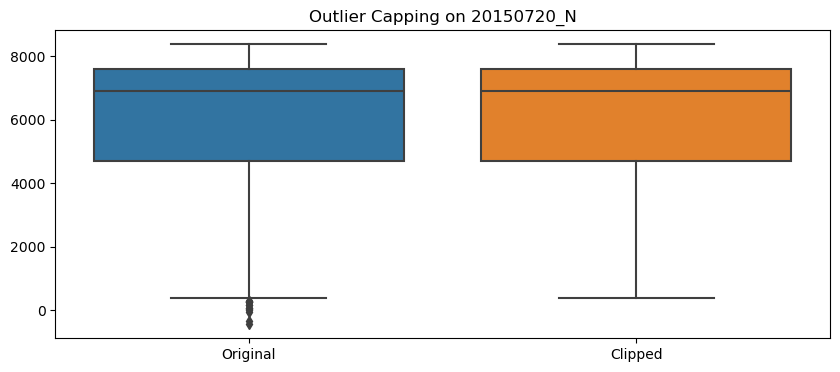

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(data=[original, clipped])
plt.xticks([0, 1], ['Original', 'Clipped'])
plt.title(f"Outlier Capping on {col}")
plt.show()


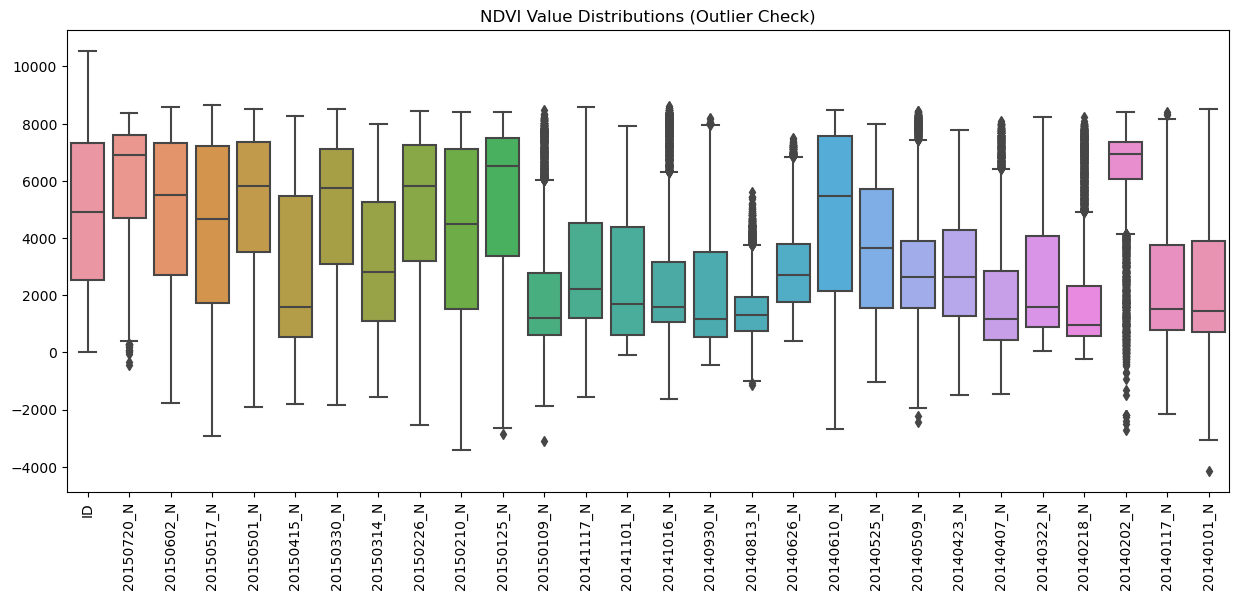

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# X = traindf.drop(columns=['class'])
plt.figure(figsize=(15, 6))
sns.boxplot(data=X)  
plt.xticks(rotation=90)
plt.title("NDVI Value Distributions (Outlier Check)")
plt.show()


In [ ]:

def cap_outliers_iqr(df):
    capped_df = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR
        capped_df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return capped_df


# X = traindf.drop(columns=['class'])
X_capped = cap_outliers_iqr(X)


In [ ]:
def cap_all_ndvi_columns(df):
    capped_df = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        capped_df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return capped_df
ndvi_cols = [col for col in X.columns if col.endswith('_N')]
X_capped = cap_all_ndvi_columns(X[ndvi_cols])


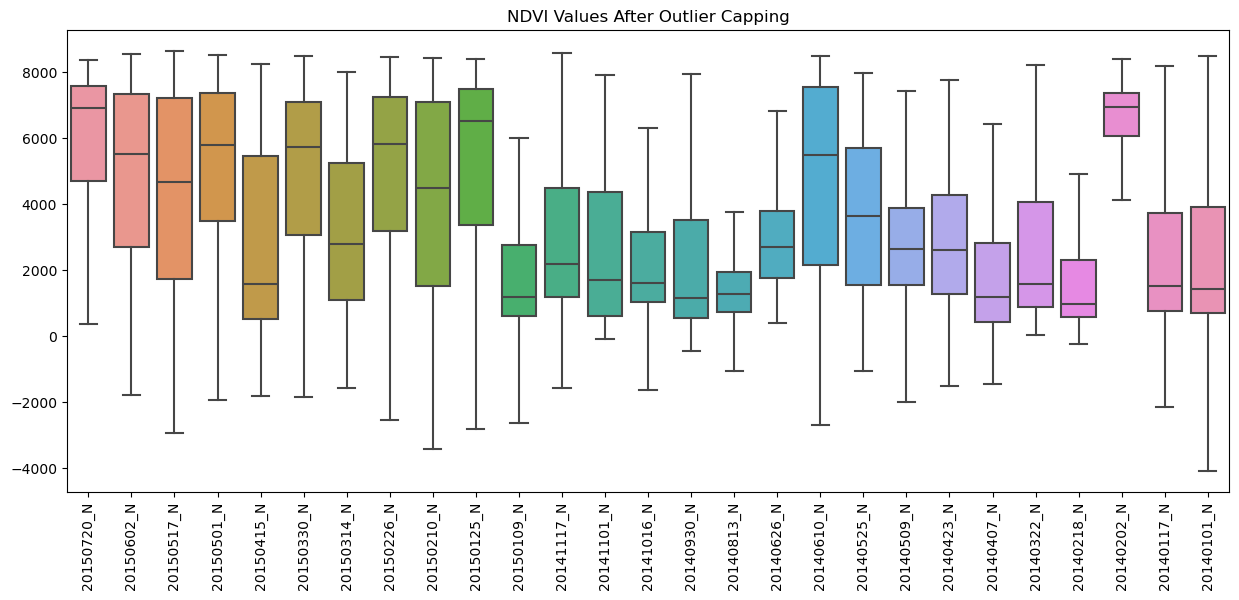

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=X_capped)
plt.xticks(rotation=90)
plt.title("NDVI Values After Outlier Capping")
plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
traindf['class'] = label_encoder.fit_transform(traindf['class'])
traindf


,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,5,637.5950,658.668,-1882.030,-1924.360,997.904,-1739.990,630.087,5831.120,...,5484.905,-1043.160,-1942.490,267.138,1183.715,1599.385,211.3280,-2203.020,-1180.19,433.906
1,2,5,634.2400,593.705,-1625.790,-1672.320,914.198,-692.386,707.626,-1670.590,...,5484.905,-933.934,-625.385,120.059,364.858,476.972,220.8780,-2250.000,-1360.56,524.075
2,4,5,58.0174,-1599.160,4672.000,-1052.630,1586.240,-1564.630,2802.010,729.790,...,-1025.880,368.622,2633.695,-1227.800,304.621,1599.385,369.2140,-2202.120,1521.21,-1343.550
3,5,5,72.5180,5513.375,380.436,-1256.930,515.805,-1413.180,-802.942,683.254,...,-1813.950,155.624,2633.695,-924.073,432.150,282.833,298.3200,-2197.360,1521.21,-826.727
4,8,5,1136.4400,5513.375,4672.000,1647.830,1935.800,5742.485,2158.980,5831.120,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.6500,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,3,1207.7000,984.620,4672.000,1166.250,937.478,1072.700,823.896,943.698,...,1117.740,1176.600,1044.110,2624.125,369.082,465.843,362.8820,979.795,1521.21,433.659
7996,10539,3,2170.3500,1419.720,1361.000,1478.710,983.911,1262.110,1422.860,1401.970,...,984.634,2128.970,1379.660,2624.125,762.633,485.204,446.7240,771.747,1589.06,506.936
7997,10542,3,1895.6800,1454.740,4672.000,1033.560,1930.380,1057.150,1471.600,5831.120,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.0000,1818.650,2501.72,1247.770
7998,10543,3,3465.7400,1283.320,413.412,4391.050,1146.820,4473.050,1614.750,770.469,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,969.7115,3759.710,1521.21,388.346


In [10]:
X = traindf.drop(columns=['class'])
y = traindf['class']

In [62]:
X.columns

Index(['ID', '20150720_N', '20150602_N', '20150517_N', '20150501_N',
       '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N',
       '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N',
       '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N',
       '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N',
       '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [11]:
X[X_capped.columns]=X_capped

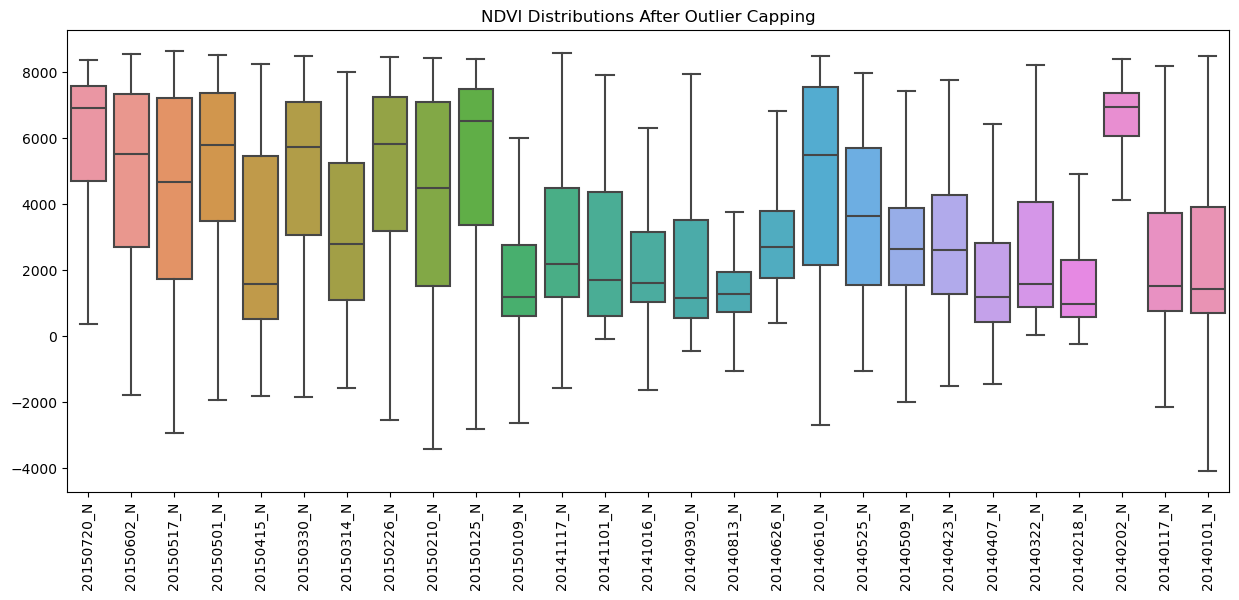

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.boxplot(data=X.loc[:, X_capped.columns]) 
plt.xticks(rotation=90)
plt.title("NDVI Distributions After Outlier Capping")
plt.show()


In [12]:
X 
y

0       5
1       5
2       5
3       5
4       5
       ..
7995    3
7996    3
7997    3
7998    3
7999    3
Name: class, Length: 8000, dtype: int32

In [13]:
X.shape, y.shape

((8000, 28), (8000,))

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
%pip install xgboost



  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


In [ ]:
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=10
)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))


              precision    recall  f1-score   support

        farm       0.91      0.44      0.59       168
      forest       0.96      0.99      0.97      1232
       grass       0.00      0.00      0.00        39
  impervious       0.53      0.99      0.69       134
     orchard       0.00      0.00      0.00         6
       water       0.00      0.00      0.00        21

    accuracy                           0.89      1600
   macro avg       0.40      0.40      0.38      1600
weighted avg       0.88      0.89      0.87      1600



c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labe

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6000, 28), (2000, 28), (6000,), (2000,))

In [18]:
import xgboost as xgb
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=6,  # number of classes
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)


c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6, ...)

In [84]:
model0 = LogisticRegression(
    multi_class='multinomial',
)

In [85]:
model0.fit(X_train, y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [19]:
model.fit(X_train,y_train)

c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6, ...)

In [86]:
y_preds = model0.predict(X_test)

In [20]:
y_preds = model.predict(X_test)


In [21]:
from sklearn.metrics import auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report, accuracy_score

In [22]:
print("Classification Report:\n")

print(classification_report(y_test, y_preds))

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       207
           1       1.00      1.00      1.00      1534
           2       0.90      0.87      0.88        53
           3       0.94      0.91      0.92       171
           4       0.60      0.33      0.43         9
           5       0.92      0.92      0.92        26

    accuracy                           0.98      2000
   macro avg       0.88      0.83      0.85      2000
weighted avg       0.98      0.98      0.98      2000



In [23]:
test_data = pd.read_csv("hacktest.csv")
test_data.shape
test_data

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,1,2,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,2,3,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,3,4,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,4,5,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2840,2841,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,2841,2842,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,2842,2843,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,2843,2844,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [24]:
ID=test_data['ID']
# test_data.drop(['Unnamed'],axis=1,inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)



In [25]:
test_data.shape

(2845, 28)

In [26]:
y_test = model.predict(test_data)

In [27]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
y_decoded = label_encoder.inverse_transform(y_test)
y_decoded

array(['forest', 'forest', 'forest', ..., 'forest', 'forest', 'forest'],
      dtype=object)

In [29]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})

In [30]:
result

,ID,class
0,1,forest
1,2,forest
2,3,forest
3,4,forest
4,5,forest
...,...,...
2840,2841,forest
2841,2842,forest
2842,2843,forest
2843,2844,forest


In [32]:
result.to_csv("submission1.csv", index=False) #this file will appear under the output section of the right navbar. You need to submit this csv file

<h1>GridSearchCV; Accuracy: 96%</h1>

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [24]:
params = [
    {
        "penalty": ['l1', 'l2', 'elasticnet', None]
    },
    {
        "tol": [0.1, 0.001, 0.0001, 0.00001]
    },
    {
        "C": [1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4]
    },
    {
        "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    },
    {
        "max_iter": [10, 100, 150, 200, 500, 1000]
    },
]

In [25]:
model1 = LogisticRegression()

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid_logisticreg = GridSearchCV(model1, params, cv=5, scoring='accuracy', n_jobs=-1)

In [28]:
grid_logisticreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet', None]},
                         {'tol': [0.1, 0.001, 0.0001, 1e-05]},
                         {'C': [1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4]},
                         {'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']},
                         {'max_iter': [10, 100, 150, 200, 500, 1000]}],
             scoring='accuracy')

In [29]:
y_preds1 = grid_logisticreg.predict(X_test)

In [30]:
print("Classification Report of Model1 using GridSearchCV:\n")

print(classification_report(y_test, y_preds1))

Classification Report of Model1 using GridSearchCV:

              precision    recall  f1-score   support

        farm       0.86      0.88      0.87       207
      forest       0.99      1.00      0.99      1534
       grass       0.84      0.79      0.82        53
  impervious       0.83      0.82      0.83       171
     orchard       0.38      0.33      0.35         9
       water       0.88      0.81      0.84        26

    accuracy                           0.96      2000
   macro avg       0.80      0.77      0.78      2000
weighted avg       0.96      0.96      0.96      2000



In [31]:
grid_logisticreg.best_params_

{'solver': 'newton-cg'}

In [32]:
grid_logisticreg.best_score_

0.9595

In [33]:
grid_logisticreg.best_estimator_

LogisticRegression(solver='newton-cg')

In [34]:
grid_logisticreg.best_index_

19

In [35]:
grid_logisticreg.scorer_

make_scorer(accuracy_score)

In [36]:
grid_logisticreg.n_splits_

5

In [37]:
grid_logisticreg.refit_time_

3.045867443084717

In [38]:
np.unique(y_preds1)

array(['farm', 'forest', 'grass', 'impervious', 'orchard', 'water'],
      dtype=object)

In [39]:
ar_unique, i = np.unique(y_preds1, return_counts=True)
print("Unique values:", ar_unique)
print("Counts:", i)

Unique values: ['farm' 'forest' 'grass' 'impervious' 'orchard' 'water']
Counts: [ 211 1539   50  168    8   24]


<p style="font-size: 25px">
    GridSearchCV Model Performed Better than the Simple Logistic Regression Model
</p>

<h1>
    Simple Pipeline: Imputation, StandardScaler, LogisticRegression; Accuracy: 87%
</h1>

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [41]:
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

In [42]:
traindf = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")

traindf.drop(["Unnamed: 0", "ID"], axis=1, inplace=True)

In [43]:
X = traindf.drop(columns=["class"])
y = traindf["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6000, 27), (6000,), (2000, 27), (2000,))

In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=1000))])

In [46]:
y_preds2 = pipeline.predict(X_test)

In [47]:
print("Classification Report of Model2 using Pipeline (SimpleImputer, StandardScaler, LogisticRegression):\n")

print(classification_report(y_test, y_preds2))

Classification Report of Model2 using Pipeline (SimpleImputer, StandardScaler, LogisticRegression):

              precision    recall  f1-score   support

        farm       0.68      0.46      0.55       207
      forest       0.90      0.97      0.94      1534
       grass       0.72      0.25      0.37        53
  impervious       0.81      0.77      0.79       171
     orchard       0.33      0.11      0.17         9
       water       0.61      0.54      0.57        26

    accuracy                           0.87      2000
   macro avg       0.68      0.52      0.56      2000
weighted avg       0.86      0.87      0.86      2000



<p style="font-size: 25px">
    Simple Pipeline: Imputation, StandardScaler, LogisticRegression; Accuracy: 87%
</p>

<h3>
    Summary of Models
</h3>

<h4>
    Simple Logistic Regression Model (model0):
    <ul>
        <li>LogisticRegression initialized with <code>multi_class='multinomial'</code>.</li>
        <li>Model trained using <code>model0.fit(X_train, y_train)</code>.</li>
        <li>Predictions made using <code>model0.predict(X_test)</code>.</li>
        <li>Accuracy of 94% is achieved</li>
    </ul>
</h4>

<h4>
    Logistic Regression Model (model1):
    <ul>
        <li>Standard LogisticRegression initialized with default parameters.</li>
        <li>Used as a base estimator for hyperparameter tuning via GridSearchCV.</li>
        <li>GridSearchCV applied on model1 for hyperparameter optimization.</li>
        <li>Parameters tuned: <code>params</code>, using 5-fold cross-validation.</li>
        <li>Scoring based on accuracy with parallel jobs enabled (<code>n_jobs=-1</code>).</li>
        <li>Accuracy of 96% is achieved</li>
    </ul>
</h4>

<h4>
    Pipeline with Imputation (pipeline):
    <ul>
        <li>Pipeline created to preprocess data using <code>SimpleImputer(strategy="mean")</code>.</li>
        <li>Allows sequential execution of imputation followed by model fitting.</li>
        <li>Accuracy of 87% is achieved</li>
    </ul>
</h4>
